In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

In [3]:
import numpy as np

In [4]:
x = np.array([1, 2, 4, 6, 5, 8])
y = np.array([0, 1, 3, 2, 5, 7])

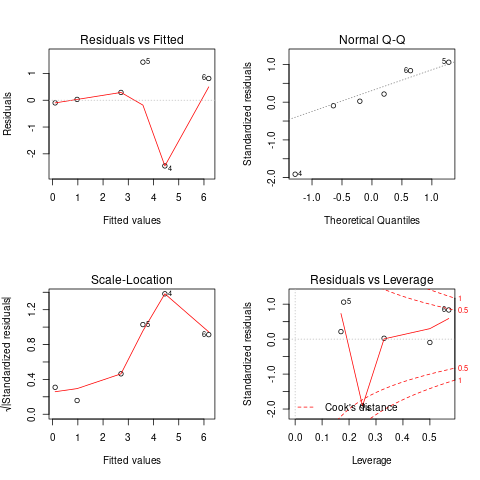

In [5]:
%%R -i x,y -o mycoef
xylm = lm(y~x)
mycoef = coef(xylm)
par(mfrow = c(2, 2))
plot(xylm)

In [6]:
del x,y,mycoef

## My attempt

In [7]:
import pandas as pd

In [8]:
df = pd.read_feather('site_175_report.feather')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

# df = df.loc[df['timestamp'].dt.to_period('M')  == '2021-10']
df = df.loc[(df['timestamp'].dt.month.isin([4,5,6])) & (df['timestamp'].dt.year == 2021) ]

df['hour'] = df.timestamp.dt.hour.astype(str)
df['DOW'] =  df.timestamp.dt.day_of_week.astype(str)
df['month'] = df.timestamp.dt.month.astype(str)

df.head()

,site_name,report_date,time_period_ending,time_interval,0_-_520_cm,521_-_660_cm,661_-_1160_cm,1160+_cm,0_-_10_mph,11_-_15_mph,...,56_-_60_mph,61_-_70_mph,71_-_80_mph,80+_mph,avg_mph,total_volume,timestamp,hour,DOW,month
0,M42/6482L,2021-06-15T00:00:00,00:14:00,0,0,0,0,0,,,...,,,,,0,0,2021-06-15 00:14:00,0,1,6
1,M42/6482L,2021-06-15T00:00:00,00:29:00,1,0,0,0,0,,,...,,,,,0,0,2021-06-15 00:29:00,0,1,6
2,M42/6482L,2021-06-15T00:00:00,00:44:00,2,0,0,0,0,,,...,,,,,0,0,2021-06-15 00:44:00,0,1,6
3,M42/6482L,2021-06-15T00:00:00,00:59:00,3,0,0,0,0,,,...,,,,,0,0,2021-06-15 00:59:00,0,1,6
4,M42/6482L,2021-06-15T00:00:00,01:14:00,4,0,0,0,0,,,...,,,,,0,0,2021-06-15 01:14:00,1,1,6


In [17]:
data = df[['total_volume', 'hour', 'DOW','month']]

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.4, random_state=101)

In [19]:
data_test

,total_volume,hour,DOW,month
178,167,20,2,6
1084,173,7,5,6
666,0,22,0,6
303,17,3,4,6
544,345,16,6,6
...,...,...,...,...
682,1,2,1,6
447,315,15,5,6
930,281,16,3,6
1185,160,8,6,6


  total_volume       hour               DOW               month          
 Min.   :  0.0   Length:921         Length:921         Length:921        
 1st Qu.: 53.0   Class :character   Class :character   Class :character  
 Median :222.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :187.5                                                           
 3rd Qu.:299.0                                                           
 Max.   :422.0                                                           


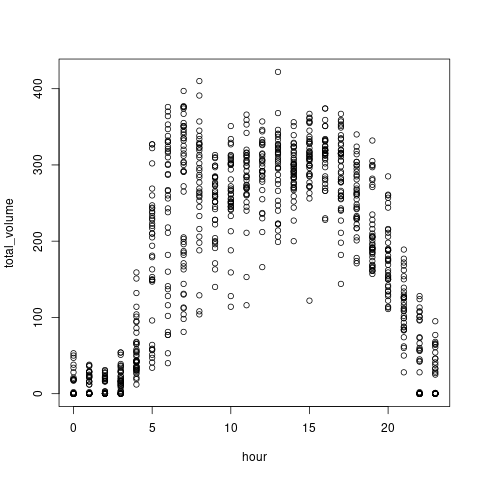

In [20]:
%%R -i data_train


print(summary(data_train))

plot(total_volume ~ hour, data_train)

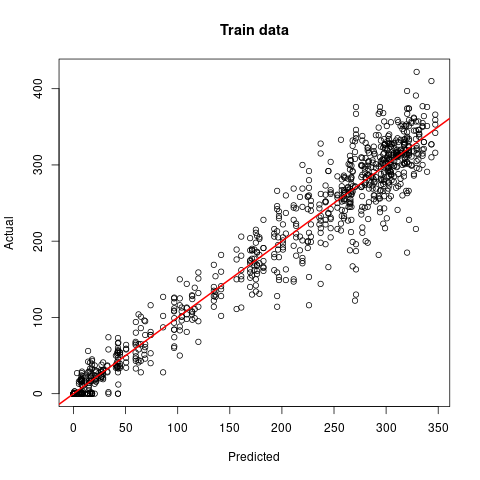

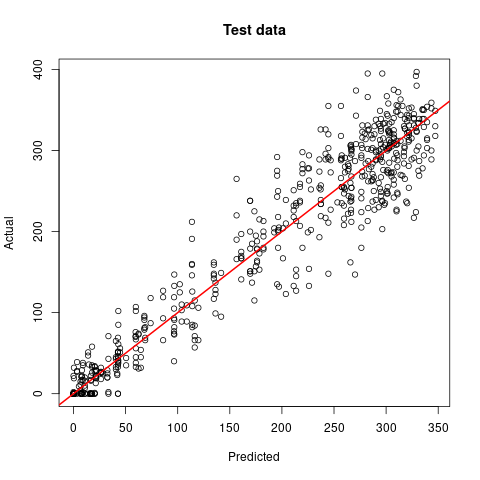

In [35]:
%%R -i data_test,data_train

lmod = lm(total_volume ~ hour*DOW, data_train)
# print(summary(lmod))
# plot(lmod)

# Plot predictions vs actual on the train data
plot(predict(lmod), data_train$total_volume, 
     xlab = "Predicted", ylab = "Actual", main = "Train data")

abline(a = 0,                                        # Add straight line
       b = 1,
       col = "red",
       lwd = 2)

# Plot predictions for the rest data
plot(predict(lmod, newdata=data_test), data_test$total_volume,
    xlab = "Predicted", ylab = "Actual", main = "Test data")

abline(a = 0,                                        # Add straight line
       b = 1,
       col = "red",
       lwd = 2)